# Linear Fit with SciKit-Learn Example 4
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia

---

### About this notebook

In this worksheet, we implement a linear model to a synthetic dataset with 1000 samples of redshift and distance modulus of distant supernovae using the `scikit-learn` package.

---

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# No warnings
import warnings
warnings.filterwarnings('ignore')

### Synthetic Data

We use the function `astroML,datasets.generate_mu_z` to generate a dataset of distance modulus vs. redshift for 1000 supernovas. The samples are randomly selected from a distribution

$\mu (z) = -5 \log _{10} \left[ (1+z) \frac{c}{H_0} \int \frac{dz}{\left(\Omega_m (1+z)^3 + \Omega_\Lambda \right)^{1/2}} \right]$

and are stored in the file `'data_sample.csv'`

In [2]:
df = pd.read_csv('data_sample.csv')
df.describe()

,z_sample,mu_sample
count,1000.000000,1000.000000
mean,0.598451,42.316572
std,0.353335,1.833948
min,0.036353,36.497657
25%,0.342411,41.108155
50%,0.518480,42.346838
75%,0.766314,43.551984
max,2.590541,47.763621


---

### Preparing the data

First, lets visualise the dataset,

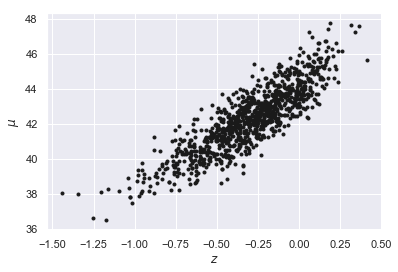

In [3]:
plt.plot(np.log10(df['z_sample']), df['mu_sample'], 'k.')
plt.xlabel(r'$z$')
plt.ylabel(r'$\mu$')

plt.show()

In order to apply the fit easily, we will define two new dataframes with the important features for the linear model. It is usual to use the capital letter X to identify the independent parameter data, because in general it is an array (for multidimensional fit).

In [4]:
Xdf = df[['z_sample']]
ydf = df[['mu_sample']]

Lets check that all 1000 samples have both values (if there is a missing value, we have to handle that sample in some way) 

In [5]:
Xdf.describe() 

,z_sample
count,1000.000000
mean,0.598451
std,0.353335
min,0.036353
25%,0.342411
50%,0.518480
75%,0.766314
max,2.590541


In [6]:
ydf.describe()

,mu_sample
count,1000.000000
mean,42.316572
std,1.833948
min,36.497657
25%,41.108155
50%,42.346838
75%,43.551984
max,47.763621


Since all samples are OK, we will separate the data frame into two sets, a train set and a test set. We will use the function `train_test_split` function from the `sklearn.model_selection` package. We will use a size of 15% for the test set. More information on this function at

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xdf, ydf, random_state=21, test_size=0.15)

Let see what we obtain:

In [8]:
X_train.shape , y_train.shape

((850, 1), (850, 1))

In [9]:
X_test.shape , y_test.shape

((150, 1), (150, 1))

### Linear Fit using  `scikit-learn`

Now we will apply the `scikit-learn.linear_model.Linear Regression` function. Complete documentation about it can be found at

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Now, we train the linear model

$y = \theta_0 + \theta_1 x$ ,

with the method `LinearRegression().fit()` and the training data

In [10]:
lr = LinearRegression().fit(X_train, y_train)

The parameters obtained from the lienar fit are recovered with the methods `.intercept_` ($\theta_0$) and `.coef_` ($\theta_1$).

In [11]:
lr.intercept_ , lr.coef_ 

(array([39.79485626]), array([[4.21756129]]))

Using the method `.score()`, which returns the coefficient of determination $R^2$ for the model, we obtain for the training and the testing sets the results

In [12]:
lr.score(X_train, y_train)

0.6748238469435419

In [13]:
lr.score(X_test, y_test)

0.7256750694103771

Finally, we plot the linear fit to see the behavior together with the observational data.

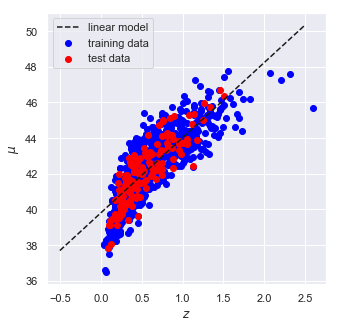

In [14]:
logsigma_range= np.linspace(-0.5, 2.5, 30)
logM = lr.intercept_[0] + lr.coef_[0]*logsigma_range


plt.figure(figsize=(5,5))
plt.scatter(X_train, y_train,label='training data', color='blue')
plt.scatter(X_test, y_test,label='test data', color='red')
plt.plot(logsigma_range, logM,'--k', label='linear model')

plt.xlabel(r'$z$')
plt.ylabel(r'$\mu$')
plt.legend()
plt.show()

---
### Score of the linear model depending on the train set size


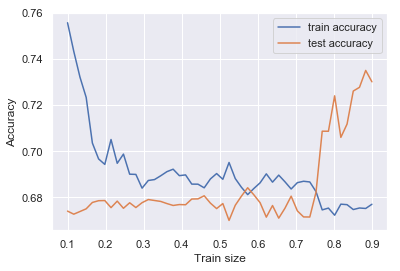

In [15]:
training_acc = []
test_acc = []

training_size = np.linspace(0.1,0.9,50)

for s in training_size:
    X_train, X_test, y_train, y_test = train_test_split(Xdf, ydf, random_state=21, train_size=s)
    lr = LinearRegression().fit(X_train, y_train)
    training_acc.append(lr.score(X_train,y_train))
    test_acc.append(lr.score(X_test,y_test))
    
plt.plot(training_size, training_acc, label='train accuracy')
plt.plot(training_size, test_acc, label='test accuracy')
plt.xlabel(r'Train size')
plt.ylabel(r'Accuracy')
plt.legend()
plt.show()